# Exploratory Data Analysis (EDA)

In [142]:
import findspark
findspark.init("C:\spark")

In [143]:
from pyspark.sql.functions import dayofmonth, month, year

In [144]:
import pyspark
import calendar
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark.context import SparkContext
import pyspark.sql.functions as F
from pyspark.sql.functions import to_timestamp, hour, month
spark = SparkSession.builder \
    .master("local") \
     .appName("Chicago Crime") \
    .getOrCreate()


sc = spark.sparkContext
sc

<SparkContext master=local appName=Chicago Crime>

## Dataset

Bu veri kümesi, Chicago Şehri'nde 2001 yılından bugüne kadar meydana gelen rapor edilen suç olaylarını yansıtmaktadır. Veriler, Chicago Polis Departmanı'nın CLEAR (Citizen Law Enforcement Analysis and Reporting - Vatandaş Hukuk Uygulama Analizi ve Raporlama) sistemi tarafından çıkarılmaktadır. Veri seti -> https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

 Veri setindeki kolanlar: 
  
 'id', -> Kayıt için benzersiz tanımlayıcı.
 
 'case_number', -> The Chicago Police Department RD Numarası, olaya özgü bir şekilde benzersizdir. 
 
 'date', -> Olayın meydana geldiği tarih 
 
 'block', -> Olayın meydana geldiği kısmen sansürlenmiş adres, gerçek adrese aynı blokta yerleştirilmiştir.
 
 'iucr', - > Illinois Uniform Crime Reporting kodu. Bu doğrudan Ana Tür ve Açıklama ile ilişkilidir. 
 
 'primary_type', -> IUCR kodunun birincil açıklaması. 
 
 'description', -> IUCR kodunun ikincil açıklaması, birincil açıklamanın bir alt kategorisi.
 
 'location_description', -> Olayın meydana geldiği konumun açıklaması.
 
 'arrest', -> Bir gözaltı yapılıp yapılmadığına dair işaret. 
 
 'domestic', -> Olayın, Illinois Domestic Violence Act tarafından tanımlandığı şekliyle, aile içi ilişkiye bağlı olup olmadığını gösterir. 
 
 'beat', -> Olayın meydana geldiği bölgeyi gösterir. Bir bölge, en küçük polis coğrafi alanıdır - her bölgede ayrılmış bir polis aracı bulunur. 
 
 'district', -> Olayın meydana geldiği polis bölgesini gösterir.  
 
 'ward', -> Olayın meydana geldiği bölge (Şehir Konseyi bölgesi) bilgisini gösterir. 
 
 'community_area', -> Olayın meydana geldiği topluluk alanını gösterir. Chicago'da 77 topluluk alanı bulunmaktadır.
 
 'fbi_code', -> "Olay sınıflandırmasını, FBI'nın Ulusal Olaya Dayalı Raporlama Sistemi (NIBRS) kapsamında belirler. 
 
 'x_coordinate', -> Olayın meydana geldiği konumun, Illinois East NAD 1983 projeksiyonunda State Plane koordinat sistemi kullanılarak belirlenen x koordinatı. Bu konum, kısmi sansürleme için gerçek konumdan kaydırılmıştır, ancak aynı blok üzerinde yer almaktadır.
 
 'y_coordinate', -> Olayın meydana geldiği konumun, Illinois East NAD 1983 projeksiyonunda State Plane koordinat sistemi kullanılarak belirlenen y koordinatı. Bu konum, kısmi sansürleme için gerçek konumdan kaydırılmıştır, ancak aynı blok üzerinde yer almaktadır. 
 
 'year', -> Olayın meydana geldiği yıl. 
 
 'updated_on', -> Kaydın son güncelleme tarihi ve saati. 
 
 'latitude', -> Olayın meydana geldiği konumun enlemi. Bu konum, kısmi sansürleme için gerçek konumdan kaydırılmıştır, ancak aynı blok üzerinde yer almaktadır. 
 
 'longitude', -> Olayın meydana geldiği konumun boylamı. Bu konum, kısmi sansürleme için gerçek konumdan kaydırılmıştır, ancak aynı blok üzerinde yer almaktadır.
 
 'location' -> Olayın meydana geldiği konumu, bu veri portalında harita oluşturma ve diğer coğrafi işlemlere izin veren bir formatta gösterir. Bu konum, kısmi sansürleme için gerçek konumdan kaydırılmıştır, ancak aynı blok üzerinde yer almaktadır.

In [145]:
spark_df = spark.read.csv("data/Crimes_-_2001_to_Present.csv",
                          header = True,
                          inferSchema=True,
                         sep = ",")

spark_df.cache()

DataFrame[ID: int, Case Number: string, Date: string, Block: string, IUCR: string, Primary Type: string, Description: string, Location Description: string, Arrest: boolean, Domestic: boolean, Beat: int, District: int, Ward: int, Community Area: int, FBI Code: string, X Coordinate: int, Y Coordinate: int, Year: int, Updated On: string, Latitude: double, Longitude: double, Location: string]

In [146]:
spark_df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: integer (nullable = true)
 |-- Y Coordinate: integer (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [147]:
spark_df.limit(5).toPandas()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,None
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"


In [148]:
#sütun isimlerini küçük harflere dönüştürmek için
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns])

In [149]:
spark_df = spark_df.withColumnRenamed("fbi code","fbi_code")
spark_df = spark_df.withColumnRenamed("x coordinate","x_coordinate")
spark_df = spark_df.withColumnRenamed("y coordinate","y_coordinate")
spark_df = spark_df.withColumnRenamed("case number","case_number")
spark_df = spark_df.withColumnRenamed("primary type","primary_type")
spark_df = spark_df.withColumnRenamed("location description","location_description")
spark_df = spark_df.withColumnRenamed("community area","community_area")
spark_df = spark_df.withColumnRenamed("updated on","updated_on")

In [150]:
#gözlem sayısı
spark_df.count()

7832929

In [151]:
# NaN ve null değerleri içeren satırları kaldır
spark_df = spark_df.dropna()

In [152]:
#gözlem sayısı
spark_df.count()

7131488

In [153]:
spark_df.columns

['id',
 'case_number',
 'date',
 'block',
 'iucr',
 'primary_type',
 'description',
 'location_description',
 'arrest',
 'domestic',
 'beat',
 'district',
 'ward',
 'community_area',
 'fbi_code',
 'x_coordinate',
 'y_coordinate',
 'year',
 'updated_on',
 'latitude',
 'longitude',
 'location']

In [154]:
spark_df.limit(5).toPandas()

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12,61,08B,1165074,1875917,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29,25,06,1138875,1904869,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35,21,18,1152037,1920384,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
3,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28,25,08A,1141706,1900086,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
4,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21,71,05,1168430,1850165,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Suç türleri-en yaygın 20
crime_type_groups = spark_df.groupBy('primary_type').count()
crime_type_counts = crime_type_groups.orderBy('count', ascending=False)
crime_type_counts.show(truncate=False)

+--------------------------------+-------+
|primary_type                    |count  |
+--------------------------------+-------+
|THEFT                           |1509475|
|BATTERY                         |1308330|
|CRIMINAL DAMAGE                 |817383 |
|NARCOTICS                       |669859 |
|ASSAULT                         |470059 |
|OTHER OFFENSE                   |443008 |
|BURGLARY                        |391753 |
|MOTOR VEHICLE THEFT             |344851 |
|DECEPTIVE PRACTICE              |305538 |
|ROBBERY                         |269680 |
|CRIMINAL TRESPASS               |196792 |
|WEAPONS VIOLATION               |102070 |
|PROSTITUTION                    |61380  |
|OFFENSE INVOLVING CHILDREN      |49786  |
|PUBLIC PEACE VIOLATION          |48878  |
|SEX OFFENSE                     |26549  |
|CRIM SEXUAL ASSAULT             |24102  |
|INTERFERENCE WITH PUBLIC OFFICER|17916  |
|GAMBLING                        |13407  |
|LIQUOR LAW VIOLATION            |12825  |
+----------

In [157]:
crime_type_counts_pd = crime_type_counts.toPandas()
crime_type_groups_pd = crime_type_groups.toPandas()

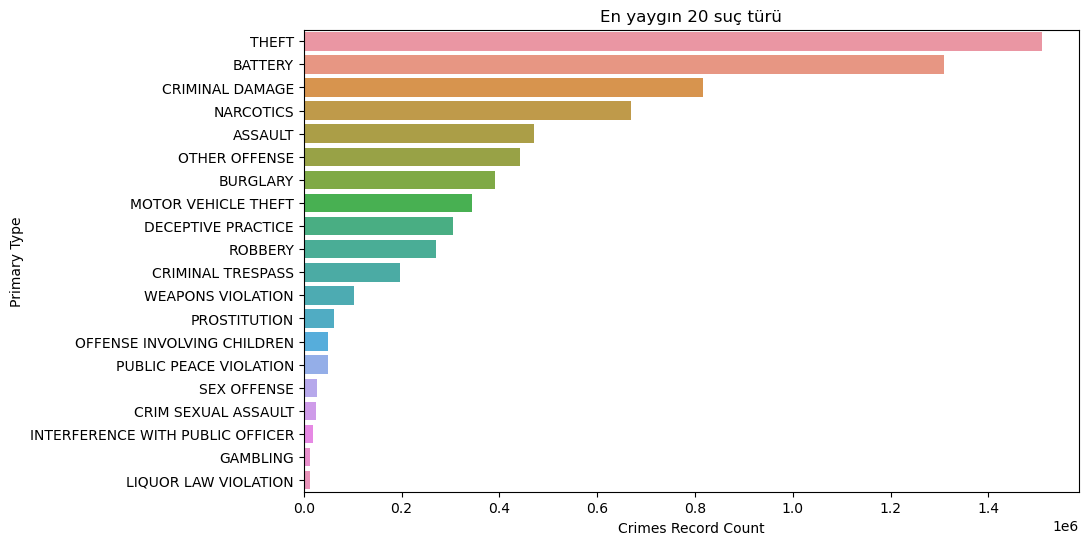

In [158]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='primary_type', data=crime_type_counts_pd.head(20))
plt.xlabel('Crimes Record Count')
plt.ylabel('Primary Type')
plt.title('En yaygın 20 suç türü')
plt.show()

In [159]:
# Olayın meydana geldiği en yaygın yerler
location_description_groups = spark_df.groupBy('location_description').count()
location_description_counts = location_description_groups.orderBy('count', ascending=False)
location_description_counts.show(truncate=False)

+------------------------------+-------+
|location_description          |count  |
+------------------------------+-------+
|STREET                        |1839216|
|RESIDENCE                     |1171275|
|APARTMENT                     |840534 |
|SIDEWALK                      |689541 |
|OTHER                         |239173 |
|PARKING LOT/GARAGE(NON.RESID.)|181746 |
|ALLEY                         |159617 |
|SMALL RETAIL STORE            |137923 |
|SCHOOL, PUBLIC, BUILDING      |131382 |
|RESIDENCE-GARAGE              |122142 |
|RESTAURANT                    |118419 |
|VEHICLE NON-COMMERCIAL        |117430 |
|RESIDENCE PORCH/HALLWAY       |112264 |
|DEPARTMENT STORE              |90453  |
|GROCERY FOOD STORE            |87848  |
|GAS STATION                   |80833  |
|RESIDENTIAL YARD (FRONT/BACK) |74793  |
|PARK PROPERTY                 |53983  |
|COMMERCIAL / BUSINESS OFFICE  |53183  |
|CHA PARKING LOT/GROUNDS       |44921  |
+------------------------------+-------+
only showing top

In [160]:
location_description_groups_pd = location_description_groups.toPandas()
location_description_counts_pd = location_description_counts.toPandas()

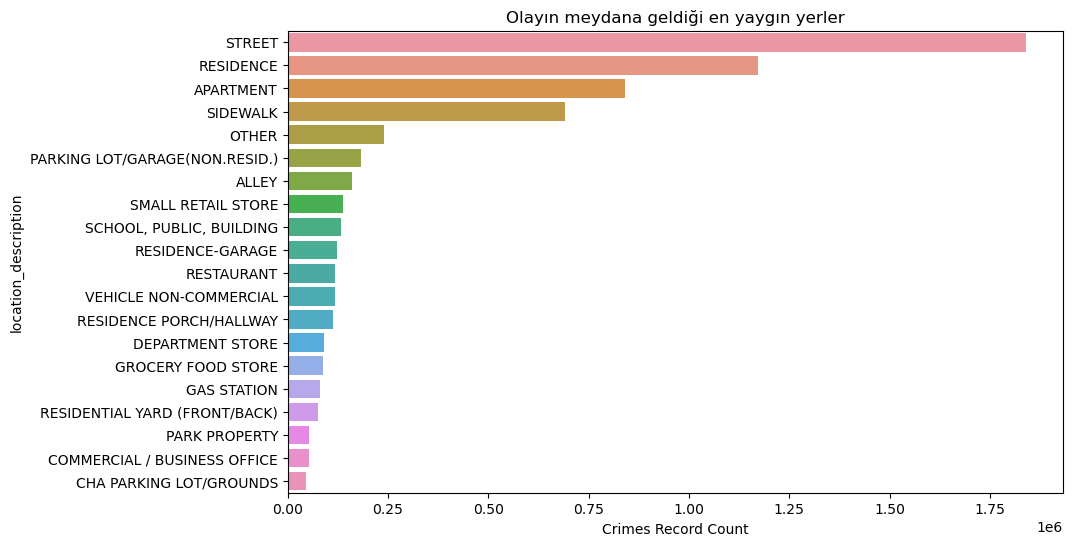

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='location_description', data=location_description_counts_pd.head(20))
plt.xlabel('Crimes Record Count')
plt.ylabel('location_description')
plt.title('Olayın meydana geldiği en yaygın yerler')
plt.show()

In [162]:
# 2002-2022 arası toplam olay sayıları
year_groups = spark_df.groupBy('year').count()
year_counts = year_groups.orderBy('count', ascending=False)
year_counts.show(truncate=False)

+----+------+
|year|count |
+----+------+
|2003|471995|
|2004|467132|
|2005|449868|
|2006|445500|
|2007|435532|
|2008|419794|
|2009|385849|
|2010|369806|
|2011|350906|
|2002|345026|
|2012|335099|
|2013|306325|
|2014|273611|
|2016|266483|
|2017|264157|
|2018|262838|
|2019|258163|
|2015|257792|
|2022|232520|
|2020|207438|
+----+------+
only showing top 20 rows



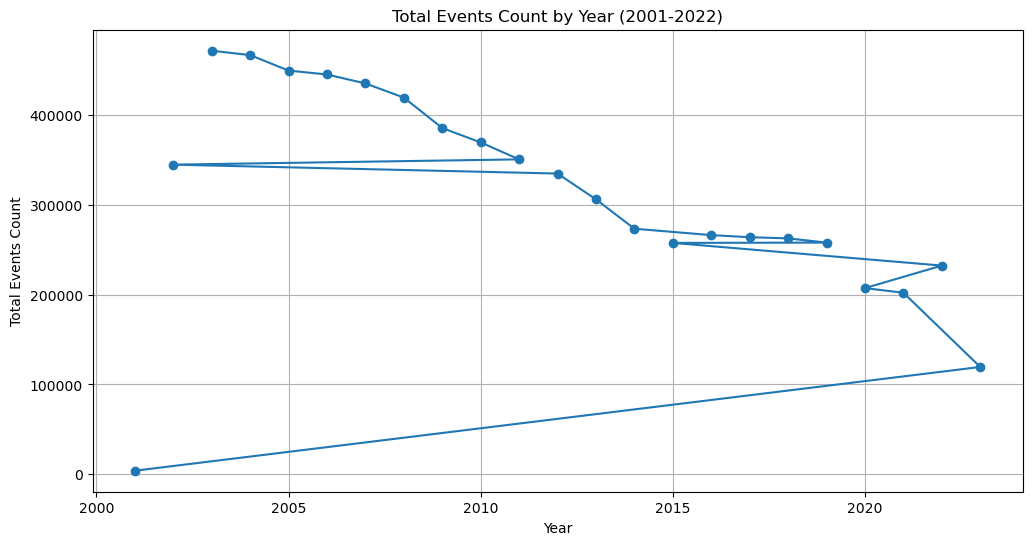

In [163]:
# Pandas DataFrame'e dönüştürme
year_counts_pd = year_counts.toPandas()

plt.figure(figsize=(12, 6))
plt.plot(year_counts_pd['year'], year_counts_pd['count'], marker='o')
plt.xlabel('Year')
plt.ylabel('Total Events Count')
plt.title('Total Events Count by Year (2001-2022)')
plt.grid(True)
plt.show()

In [164]:
spark_df = spark_df.withColumn("date", to_timestamp("date", "MM/dd/yyyy hh:mm:ss a"))

spark_df = spark_df.withColumn("hour", hour("date"))
spark_df = spark_df.withColumn("day", dayofmonth("date"))
spark_df = spark_df.withColumn("month", month("date"))

In [165]:
selected_columns = ["primary_type", "location_description", "arrest", "day", "month", "year"]
selected_df = spark_df.select(selected_columns).limit(10).toPandas()
selected_df 

,primary_type,location_description,arrest,day,month,year
0,BATTERY,RESIDENCE,False,5,9,2015
1,THEFT,CTA BUS,False,4,9,2015
2,NARCOTICS,SIDEWALK,True,5,9,2015
3,ASSAULT,APARTMENT,False,5,9,2015
4,BURGLARY,RESIDENCE,False,5,9,2015
5,BURGLARY,RESIDENCE-GARAGE,False,4,9,2015
6,THEFT,GROCERY FOOD STORE,True,5,9,2015
7,ROBBERY,STREET,False,5,9,2015
8,THEFT,PARKING LOT/GARAGE(NON.RESID.),False,5,9,2015
9,BATTERY,SMALL RETAIL STORE,False,5,9,2015


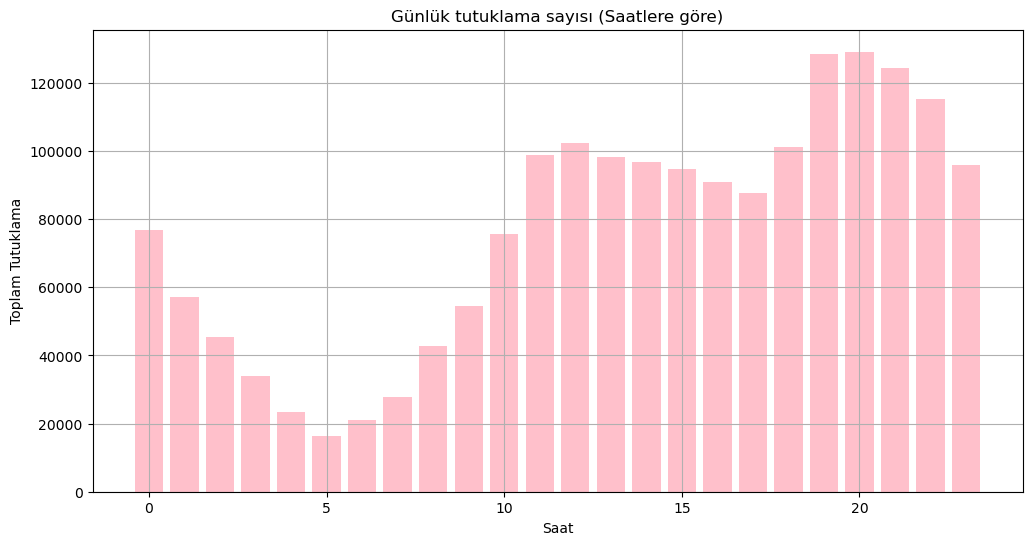

In [166]:
hourly_arrests = spark_df.filter(spark_df['arrest'] == True).groupBy(hour("date").alias("hour")).count()

# Saat bilgisine göre sırala
hourly_arrests = hourly_arrests.orderBy("hour")

# Pandas DataFrame'e dönüştür
hourly_arrests_pd = hourly_arrests.toPandas()

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.bar(hourly_arrests_pd['hour'], hourly_arrests_pd['count'], color='pink')
plt.xlabel('Saat')
plt.ylabel('Toplam Tutuklama')
plt.title('Günlük tutuklama sayısı (Saatlere göre)')
plt.grid(True)
plt.show()

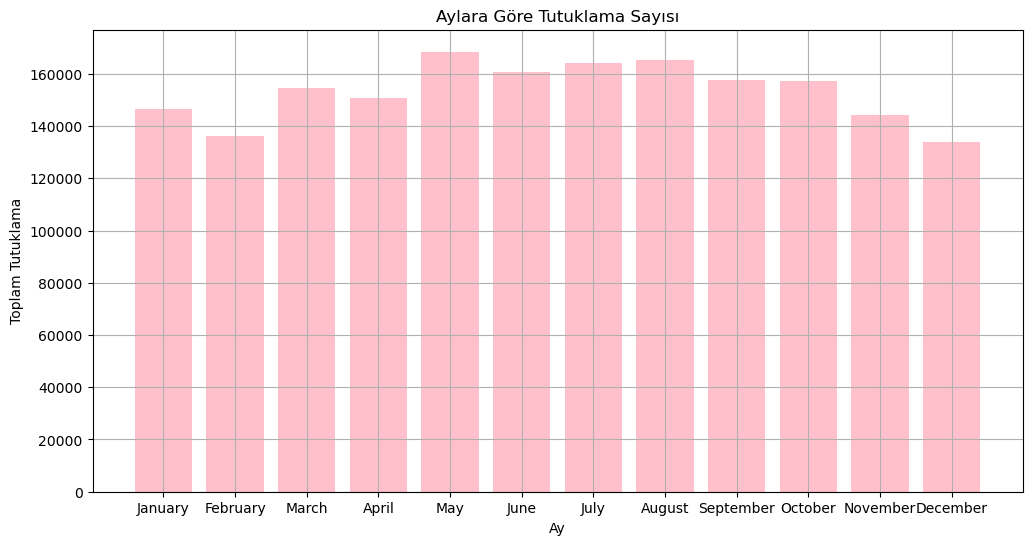

In [167]:
monthly_arrests = spark_df.filter(spark_df['arrest'] == True).groupBy(month("date").alias("month")).count()
# Aya göre sırala
monthly_arrests = monthly_arrests.orderBy("month")
monthly_arrests_pd = monthly_arrests.toPandas()
# Ay numaralarını ayların isimleriyle değiştir
monthly_arrests_pd['month'] = monthly_arrests_pd['month'].apply(lambda x: calendar.month_name[x])

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.bar(monthly_arrests_pd['month'], monthly_arrests_pd['count'],color="pink")
plt.xlabel('Ay')
plt.ylabel('Toplam Tutuklama')
plt.title('Aylara Göre Tutuklama Sayısı')
plt.grid(True)
plt.show()

In [168]:
monthly_arrests_pd = monthly_arrests.toPandas()
monthly_arrests_pd

,month,count
0,1,146458
1,2,136258
2,3,154697
3,4,150826
4,5,168457
5,6,160585
6,7,164161
7,8,165257
8,9,157645
9,10,157195


In [169]:
# Tutuklanma yapılıp yapılmadığı
arrest_groups = spark_df.groupBy('arrest').count()
arrest_counts = arrest_groups.orderBy('count', ascending=False)
arrest_counts.show(truncate=False)

+------+-------+
|arrest|count  |
+------+-------+
|false |5291975|
|true  |1839513|
+------+-------+



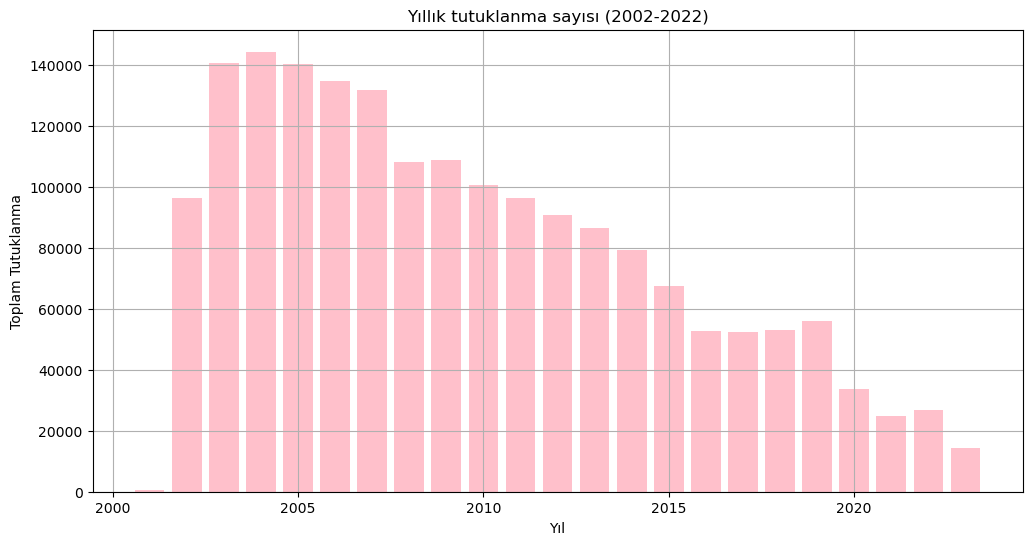

In [170]:
# Tutuklanma yapılıp yapılmadığını gruplama ve sayma
arrest_groups = spark_df.filter(spark_df['arrest'] == True).groupBy('year').count()
arrest_counts = arrest_groups.orderBy('year')

# Pandas DataFrame'e dönüştürme
arrest_counts_pd = arrest_counts.toPandas()

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.bar(arrest_counts_pd['year'], arrest_counts_pd['count'], color='pink')
plt.xlabel('Yıl')
plt.ylabel('Toplam Tutuklanma')
plt.title('Yıllık tutuklanma sayısı (2002-2022)')
plt.grid(True)
plt.show()

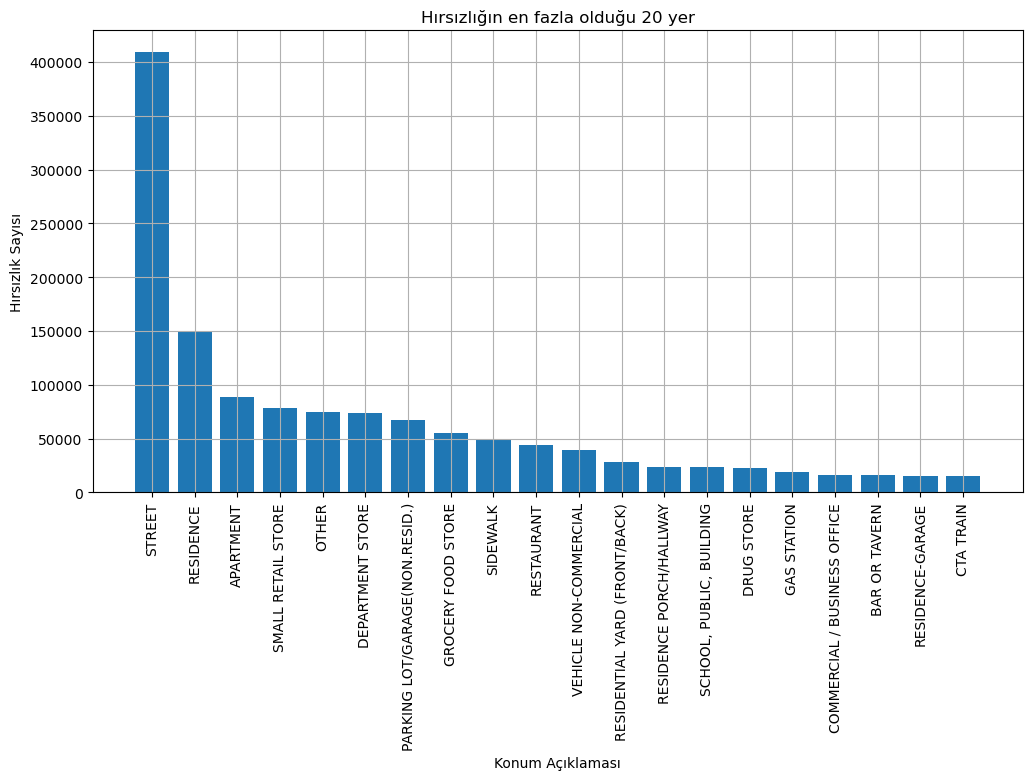

In [171]:
#Hırsızlığın en fazla olduğu ilk 20 yer
theft_groups_count = spark_df.filter(spark_df['primary_type'] == "THEFT").groupBy("location_description").count()

# Pandas DataFrame'e dönüştür
theft_counts_pd = theft_groups_count.toPandas()

# En fazla 20 konumu seç
top_20_locations = theft_counts_pd.nlargest(20, 'count')

# Grafik çizimi
plt.figure(figsize=(12, 6))
plt.bar(top_20_locations['location_description'], top_20_locations['count'])
plt.xlabel('Konum Açıklaması')
plt.ylabel('Hırsızlık Sayısı')
plt.title('Hırsızlığın en fazla olduğu 20 yer')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [172]:
#Chicago has 77 community areas
#community_area
community_area_groups = spark_df.groupBy('community_area').count()
community_area_counts = community_area_groups.orderBy('count', ascending=False)
community_area_counts.show(truncate=False)

+--------------+------+
|community_area|count |
+--------------+------+
|25            |446073|
|8             |250834|
|43            |235927|
|23            |222588|
|28            |215704|
|24            |208651|
|29            |207858|
|67            |204028|
|71            |202452|
|49            |189777|
|68            |186312|
|69            |177931|
|32            |176620|
|66            |173956|
|44            |157703|
|22            |147148|
|61            |143812|
|6             |143620|
|26            |134486|
|27            |133506|
+--------------+------+
only showing top 20 rows



In [173]:
sc.stop()